In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/data_labels.csv', sep=';', header=0, low_memory=False, na_values =["", " "])

In [3]:
df.head()

,federal_state,household_size,gender,citizenship,marital_status,employment_status,employment_sector,job,employment_position,livelihood,income,educational_qualification,highest_qualification,primary_residence,Household relationship
0,1,1,male,german,divorced,econ. inactive,NaN,NaN,NaN,pension,5.0,1.0,33.0,1.0,1.0
1,1,4,male,german,married,employed,41.0,712.0,6.0,income,9.0,1.0,33.0,1.0,1.0
2,1,4,male,german,married,employed,41.0,712.0,6.0,income,9.0,1.0,33.0,1.0,1.0
3,1,4,male,german,married,employed,41.0,712.0,6.0,income,9.0,1.0,33.0,1.0,1.0
4,1,4,male,german,married,employed,41.0,712.0,6.0,income,9.0,1.0,33.0,1.0,1.0


In [4]:
#Dropping all empty samples (collective accomodation)
cols = df.columns
mask = df["gender"].isnull()
df = df[~mask].copy()

In [5]:
#Splitting data by employment status
mask_no_occupation = df["job"].isnull()

df_no_occupation = df[mask_no_occupation].copy()
df_occupation = df[~mask_no_occupation].copy()

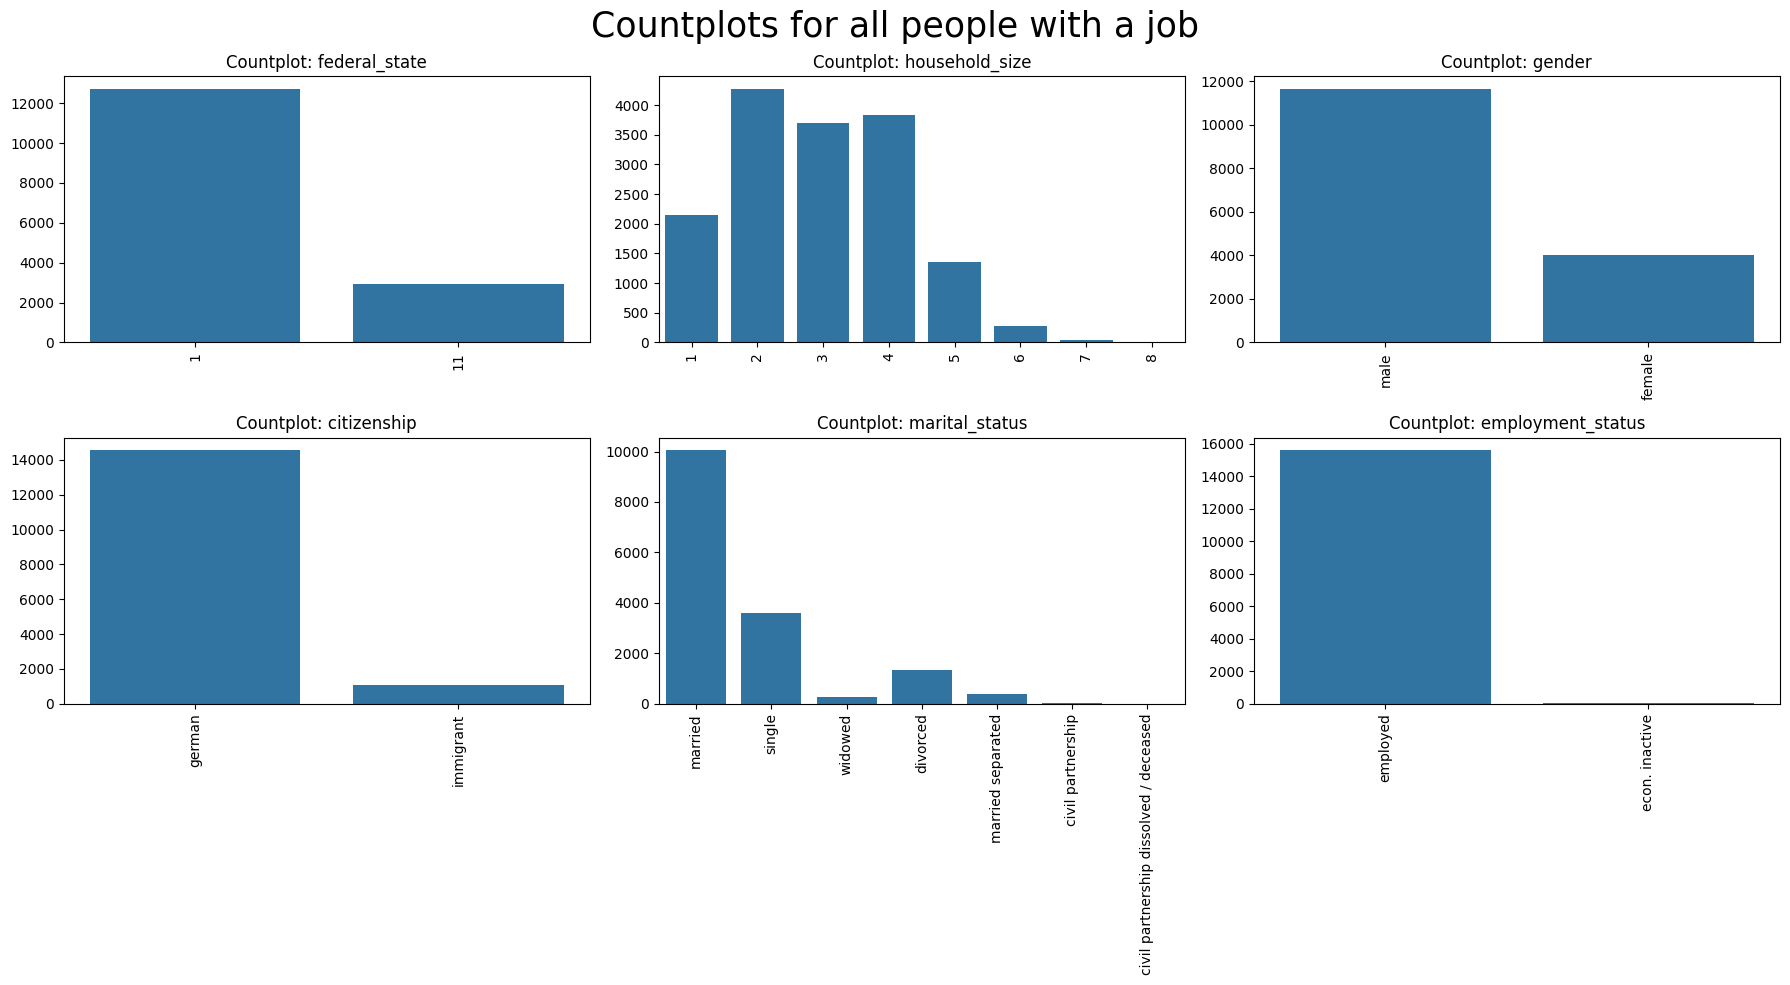

In [6]:
#Countplots for all people with a job

columns = ["federal_state", "household_size", "gender","citizenship","marital_status", "employment_status"]

fig, axes = plt.subplots(2,3, figsize=(18, 10))

for ax, col in zip(axes.ravel(), columns):
    sns.countplot(data=df_occupation, x=col, ax=ax)
    ax.set_title(f'Countplot: {col}')
    ax.tick_params(axis='x', rotation=90)
    ax.set_xlabel("")
    ax.set_ylabel("")

fig.suptitle("Countplots for all people with a job", fontsize = 25)
plt.tight_layout()
plt.show()

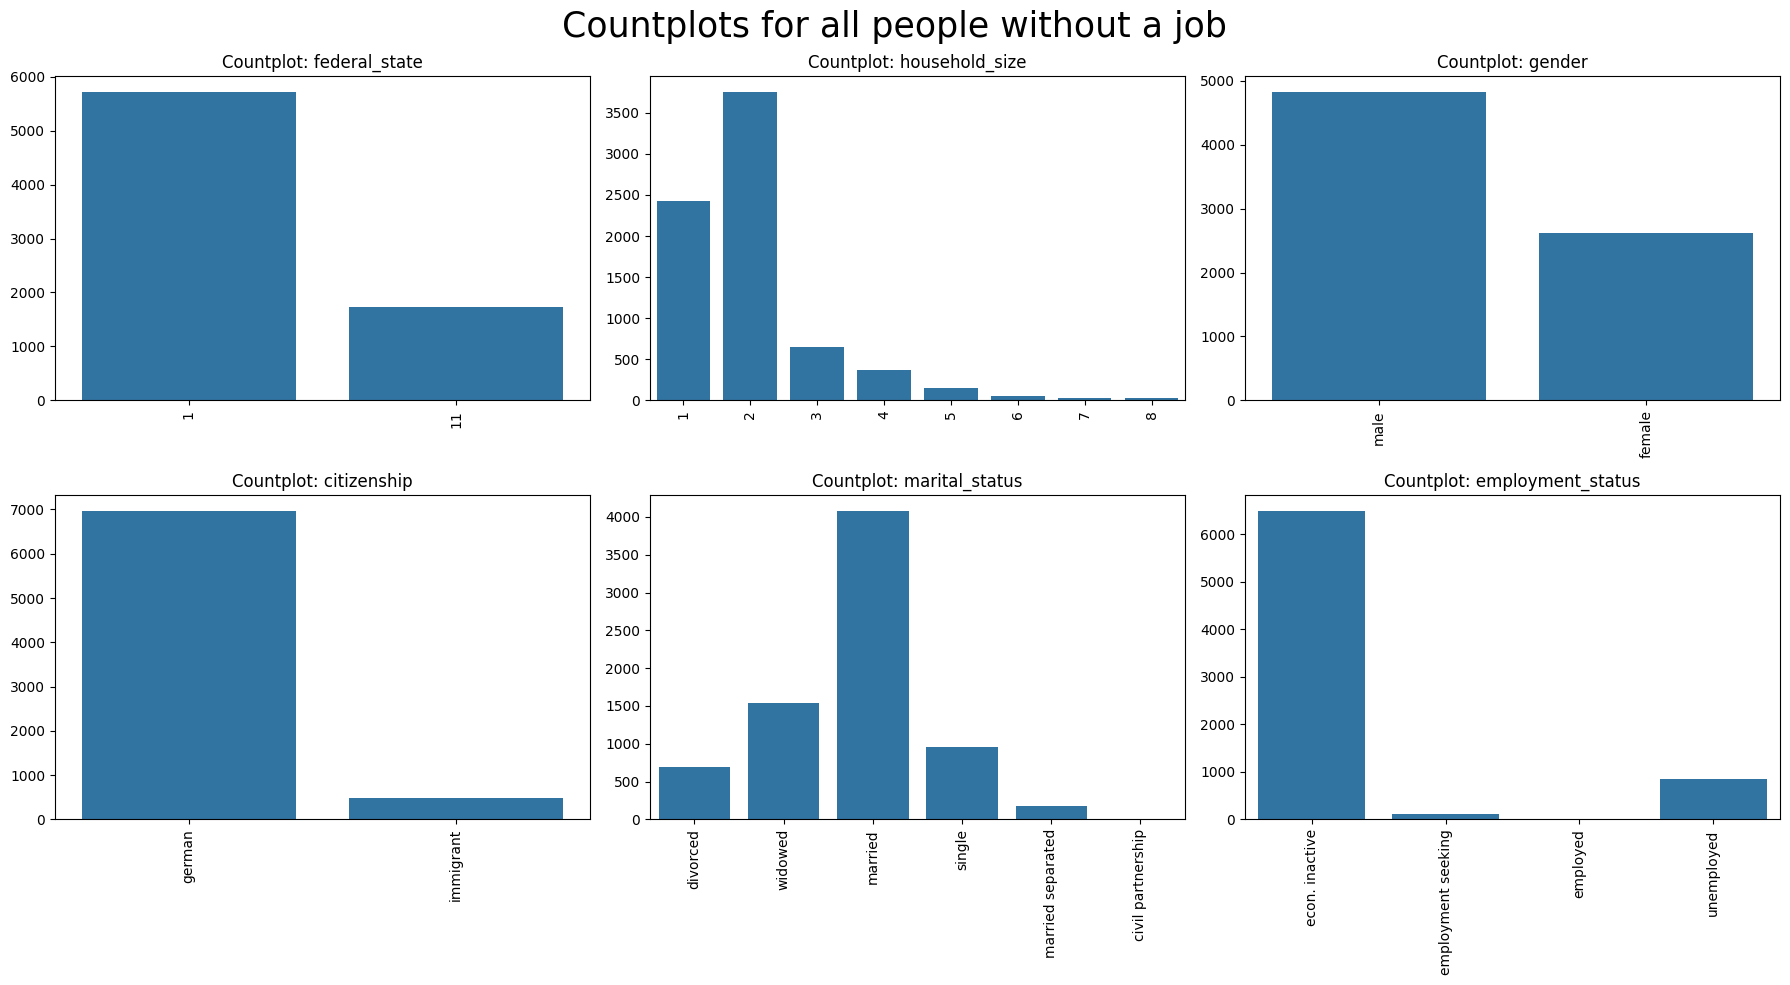

In [7]:
#Countplots for all people without a job

columns = ["federal_state", "household_size", "gender","citizenship","marital_status", "employment_status"]

fig, axes = plt.subplots(2,3, figsize=(18, 10))

for ax, col in zip(axes.ravel(), columns):
    sns.countplot(data=df_no_occupation, x=col, ax=ax)
    ax.set_title(f'Countplot: {col}')
    ax.tick_params(axis='x', rotation=90)
    ax.set_xlabel("")
    ax.set_ylabel("")

fig.suptitle("Countplots for all people without a job", fontsize = 25)
plt.tight_layout()
plt.show()

In [8]:
# table for People in employment
counts = df_occupation.groupby(["gender","livelihood"]).size().reset_index(name="count")
group_sum = counts.groupby('gender')['count'].transform('sum')
counts['proportion'] = counts['count'] / group_sum

# table for People in unemployment
counts_no_occupation = df_no_occupation.groupby(["gender","livelihood"]).size().reset_index(name="count")
group_sum = counts_no_occupation.groupby('gender')['count'].transform('sum')
counts_no_occupation['proportion'] = counts_no_occupation['count'] / group_sum

print(counts)


    gender                       livelihood  count  proportion
0   female                           assets      2    0.000499
1   female             basic income support      6    0.001496
2   female                           income   3669    0.914734
3   female              income of relatives     84    0.020942
4   female  other (BAFÃ–G, scholarship,...)     16    0.003989
5   female                    parental ben.     45    0.011219
6   female                          pension     62    0.015457
7   female         unemployment ben. (ALG1)      8    0.001995
8   female     unemployment ben. (Hartz IV)    119    0.029668
9     male                           assets     22    0.001890
10    male             basic income support      5    0.000430
11    male                           income  11293    0.970189
12    male              income of relatives     16    0.001375
13    male  other (BAFÃ–G, scholarship,...)     23    0.001976
14    male                    parental ben.      7    0

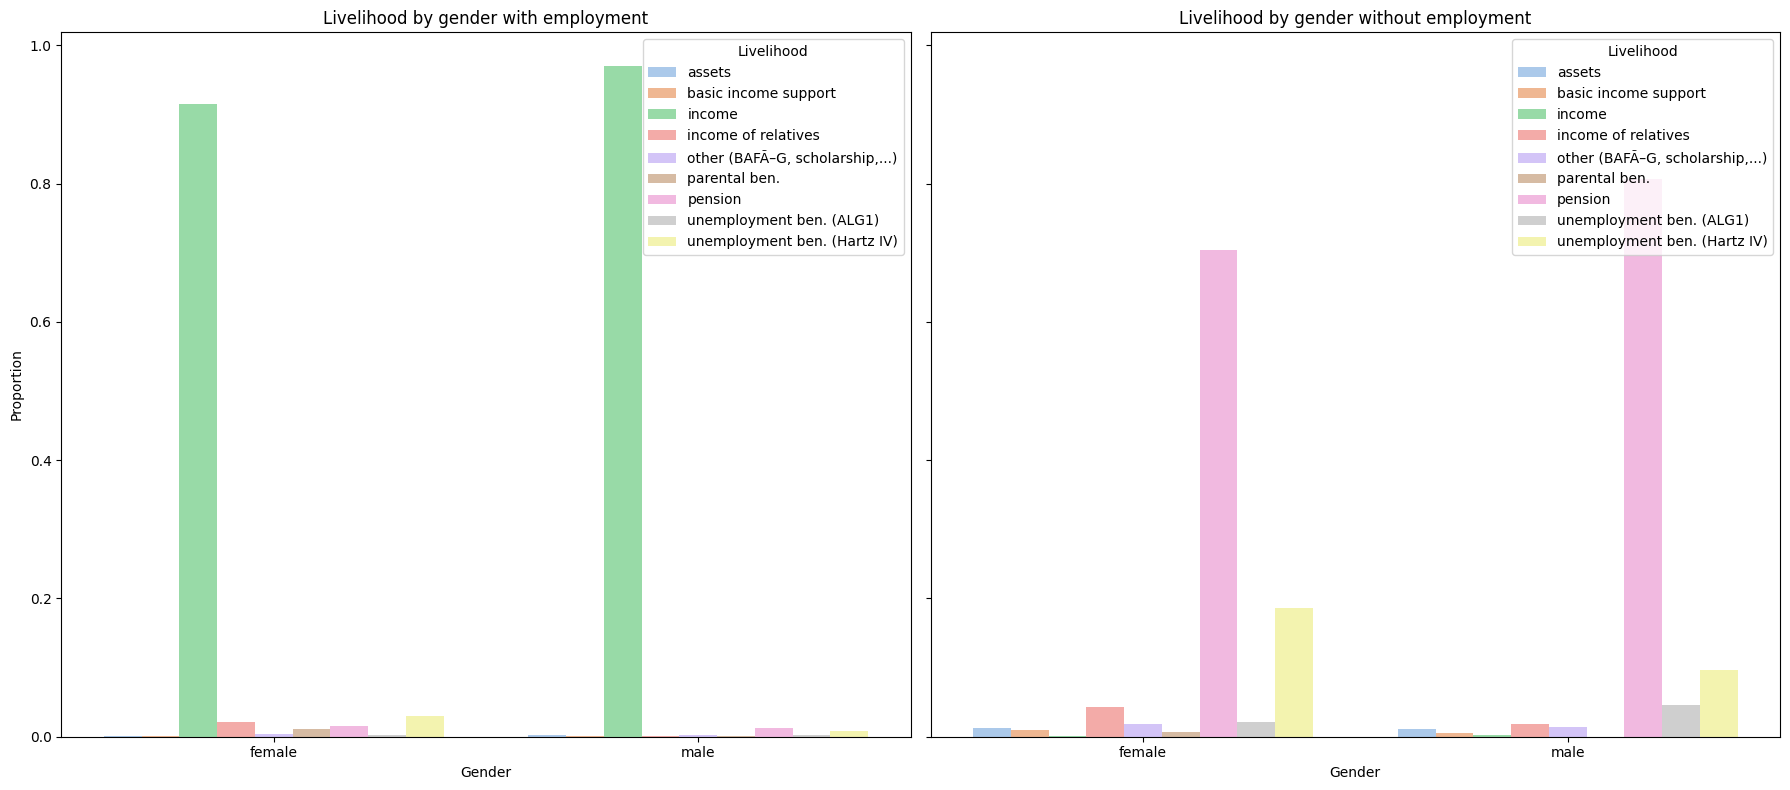

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Plot 1: with employment
sns.barplot(
    data=counts,
    x="gender", y="proportion", hue="livelihood",
    palette="pastel", errorbar=None, dodge=True, ax=axes[0]
)
axes[0].set_title("Livelihood by gender with employment")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Proportion")
axes[0].legend(title="Livelihood", loc="upper right")

# Plot 2: without employment
sns.barplot(
    data=counts_no_occupation,
    x="gender", y="proportion", hue="livelihood",
    palette="pastel", errorbar=None, dodge=True, ax=axes[1]
)
axes[1].set_title("Livelihood by gender without employment")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("") 
axes[1].legend(title="Livelihood", loc="upper right")

plt.tight_layout()
plt.show()



In [17]:
df_income = df["income"].copy()

mask_income = df["income"].isin([50,99,90])
df_income = df_income[~mask_income].to_frame()

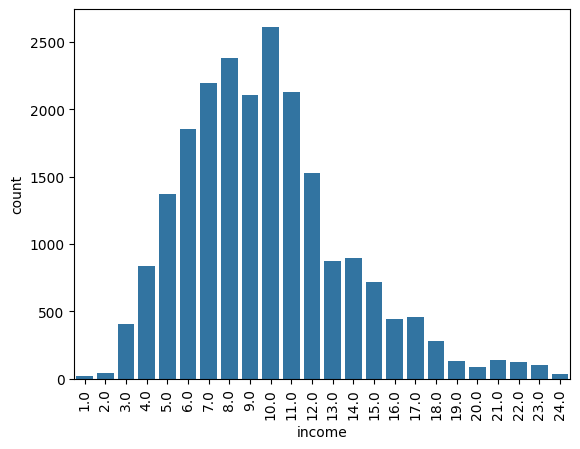

In [19]:
sns.countplot(data=df_income, x = "income")
plt.xticks(rotation=90)
plt.show()